# Import modules, data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
df_train = pd.read_csv("digits_train.csv")
df_test = pd.read_csv("digits_test.csv")
print(df_train.shape)
print(df_test.shape)

df_train.head()

(42000, 785)
(28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


c:\users\wykyee\pycharmprojects\ml\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


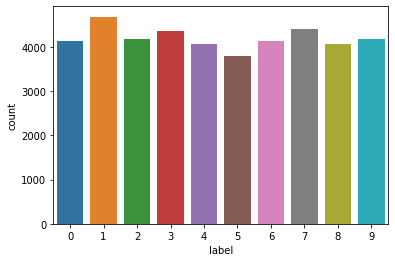

In [4]:
_ = sns.countplot(df_train.label)

# Data preparation

### Missing values

In [5]:
df_train.isnull().any().sum()  # no missing values

0

### Normalization

In [6]:
X = df_train.drop(columns=["label"])
Y = df_train.label
X_test = df_test

X = X.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

### Reshaping images

*images must be with format (width, height, num_of_channels)

In [7]:
X = X.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

print("Reshaped X_train: ", X.shape)
print("Reshaped X_test: ", X_test.shape)

Reshaped X_train:  (42000, 28, 28, 1)
Reshaped X_test:  (28000, 28, 28, 1)


### Splitting train data

In [8]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2)

### Labels' one hot encoding

In [9]:
Y_train = to_categorical(Y_train, num_classes=10)
Y_validation = to_categorical(Y_validation, num_classes=10)

### Data augmentation

*Used to provide generalization, using zooming, cropping, rotating etc.

In [10]:
generator = ImageDataGenerator(
    rotation_range=1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)
generator.fit(X_train)

# Building model

In [11]:
SIZE = (3, 3)
STRIDES = 1
PADDING = 'same'
ACTIVATION = 'relu'

model = Sequential()

model.add(Conv2D(32, kernel_size=SIZE, strides=STRIDES, 
                 padding=PADDING, activation=ACTIVATION, 
                 input_shape=(28, 28, 1)))  # adding convolutional layer
model.add(MaxPooling2D(padding=PADDING))  # adding polling layer

model.add(Conv2D(64, kernel_size=SIZE, strides=STRIDES, padding=PADDING, activation=ACTIVATION))
model.add(MaxPooling2D(padding=PADDING))

model.add(Conv2D(128, kernel_size=SIZE, strides=STRIDES, padding=PADDING, activation=ACTIVATION))
model.add(MaxPooling2D(padding=PADDING))

model.add(Flatten())

model.add(Dense(1024, activation=ACTIVATION)) # activation(dot(input, weights) + bias)
model.add(Dropout(0.3)) # to prevent overfitting
model.add(Dense(10,activation="sigmoid"))

#compiling
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])
    
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [12]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_data=(X_validation, Y_validation))

Epoch 1/10
525/525 [==============================] - 60s 112ms/step - loss: 0.4377 - accuracy: 0.8554 - val_loss: 0.0821 - val_accuracy: 0.9731
Epoch 2/10
525/525 [==============================] - 54s 104ms/step - loss: 0.0541 - accuracy: 0.9812 - val_loss: 0.0382 - val_accuracy: 0.9869
Epoch 3/10
525/525 [==============================] - 55s 104ms/step - loss: 0.0350 - accuracy: 0.9902 - val_loss: 0.0362 - val_accuracy: 0.9882
Epoch 4/10
525/525 [==============================] - 54s 102ms/step - loss: 0.0265 - accuracy: 0.9913 - val_loss: 0.0450 - val_accuracy: 0.9877
Epoch 5/10
525/525 [==============================] - 54s 102ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0492 - val_accuracy: 0.9880
Epoch 6/10
525/525 [==============================] - 54s 102ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0419 - val_accuracy: 0.9902
Epoch 7/10
525/525 [==============================] - 54s 103ms/step - loss: 0.0106 - accuracy: 0.9965 - val_loss: 0.0493 - val_ac

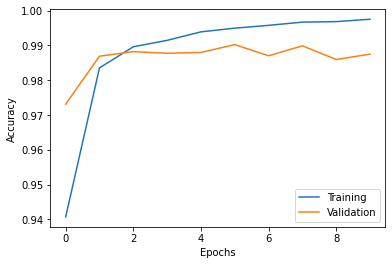

In [13]:
plt.plot(history.history['accuracy'], label=f"Training")
plt.plot(history.history['val_accuracy'], label=f"Validation")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

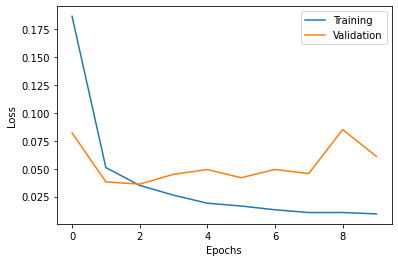

In [14]:
plt.plot(history.history['loss'], label=f"Training")
plt.plot(history.history['val_loss'], label=f"Validation")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# Predicting test data

In [15]:
predictions = model.predict(X_test)

In [16]:
result = [np.argmax(i) for i in predictions]
result_df = pd.DataFrame({
    "ImageId": df_test.index + 1,
    "Label": result
})

result_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [17]:
result_df.to_csv("submission.csv", index=False)

![](digits_recognizer_result.jpg)